## Matrix analysis

Material from [Chapter 7](https://tobydriscoll.net/fnc-julia/matrixanaly/insight.html).

A matrix is a square array of numbers. It can describe many things, for example:

* a linear transformation
* a graph, where rows and columns correspond to nodes and entries in the matrix indicate if there is an edge between the nodes, and possibly the weight or distance associated with the edge,
* an image, commonly as three matrices of red, green, and blue values, or a single matrix of grayscale values,
* tables of data such as sales records, customer preferences


## Graphs


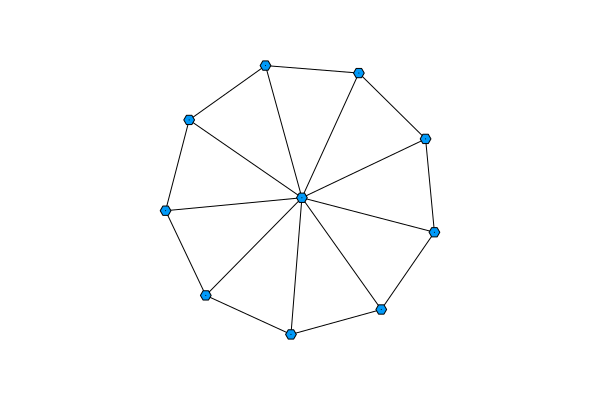

In [1]:
using Graphs, Plots, GraphRecipes
g = wheel_graph(10)
graphplot(g, curves=false)

In [2]:
Graphs.SimpleGraphs.adj(g)

10-element Vector{Vector{Int64}}:
 [2, 3, 4, 5, 6, 7, 8, 9, 10]
 [1, 3, 10]
 [1, 2, 4]
 [1, 3, 5]
 [1, 4, 6]
 [1, 5, 7]
 [1, 6, 8]
 [1, 7, 9]
 [1, 8, 10]
 [1, 2, 9]

In [3]:
Graphs.LinAlg.adjacency_matrix(g)

10×10 SparseArrays.SparseMatrixCSC{Int64, Int64} with 36 stored entries:
 ⋅  1  1  1  1  1  1  1  1  1
 1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1
 1  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1  ⋅
 1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅  1
 1  1  ⋅  ⋅  ⋅  ⋅  ⋅  ⋅  1  ⋅

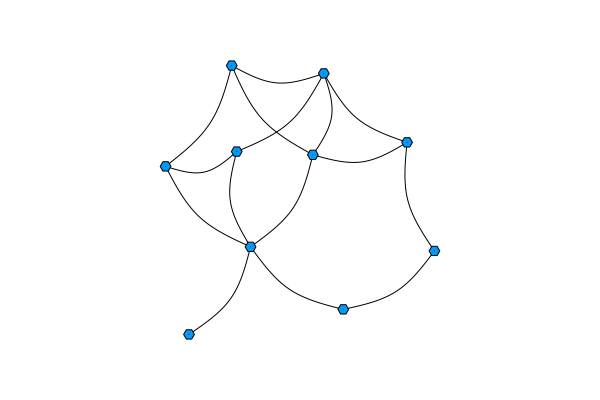

In [4]:
g2 = SimpleGraph(10, 15) # random graph with 10 vertices, 15 edges
graphplot(g2)

## Images

┌ Warning: Reading one byte at a time from HTTP.Stream is inefficient.
│ Use: io = BufferedInputStream(http::HTTP.Stream) instead.
│ See: https://github.com/BioJulia/BufferedStreams.jl
└ @ HTTP.Streams ~/.julia/packages/HTTP/RxlHW/src/Streams.jl:240


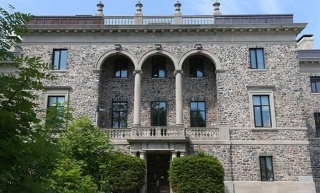

In [5]:
using Images, FileIO, HTTP
t = tempname()
image_path = "https://cdn.dal.ca/faculty/science/math-stats/_jcr_content/contentPar/featureslider/featureSlider/featureslide_50828652/image.adaptive.320.high.jpg/1533923288644.jpg"
HTTP.download(image_path, t, update_period = Inf)
img = load(t)
# rm(t) # to remove the file


In [6]:
size(img)

(193, 320)

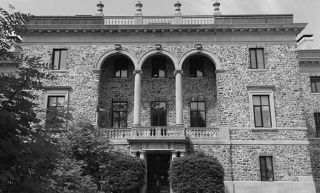

In [7]:
Gray.(img)

In [8]:
img[100, 50]

In [9]:
Float64.(Gray.(img))

193×320 Matrix{Float64}:
 0.788235   0.8        0.803922   0.796078   …  0.772549  0.776471  0.776471
 0.8        0.784314   0.780392   0.788235      0.776471  0.776471  0.776471
 0.780392   0.780392   0.788235   0.792157      0.780392  0.780392  0.772549
 0.788235   0.780392   0.776471   0.784314      0.780392  0.780392  0.776471
 0.8        0.792157   0.776471   0.784314      0.780392  0.780392  0.776471
 0.776471   0.796078   0.788235   0.796078   …  0.776471  0.780392  0.776471
 0.72549    0.784314   0.784314   0.784314      0.776471  0.776471  0.776471
 0.643137   0.776471   0.807843   0.788235      0.776471  0.776471  0.776471
 0.498039   0.313725   0.666667   0.776471      0.776471  0.776471  0.776471
 0.407843   0.301961   0.454902   0.678431      0.780392  0.784314  0.784314
 0.396078   0.788235   0.788235   0.690196   …  0.784314  0.784314  0.784314
 0.643137   0.34902    0.435294   0.180392      0.780392  0.780392  0.780392
 0.737255   0.572549   0.556863   0.537255      0.7

In [10]:
R,G,B = red.(img),green.(img),blue.(img);
B

193×320 Array{N0f8,2} with eltype N0f8:
 0.988  1.0    1.0    1.0    1.0    …  0.988  0.992  0.996  0.992  0.992
 1.0    0.984  0.996  1.0    1.0       0.996  0.996  1.0    0.992  0.992
 0.98   0.98   1.0    1.0    0.992     1.0    1.0    1.0    0.996  0.988
 0.988  0.988  0.984  1.0    1.0       1.0    1.0    1.0    0.996  0.992
 1.0    1.0    0.984  0.992  1.0       1.0    1.0    1.0    0.996  0.992
 0.973  0.992  0.984  0.992  0.984  …  1.0    1.0    1.0    0.996  0.992
 0.886  0.953  0.953  0.957  0.98      1.0    1.0    1.0    0.992  0.992
 0.769  0.91   0.945  0.949  0.965     1.0    1.0    1.0    0.992  0.992
 0.573  0.404  0.776  0.91   0.976     0.996  0.996  1.0    0.992  0.992
 0.463  0.365  0.537  0.788  0.729     0.996  1.0    1.0    1.0    1.0
 0.451  0.851  0.859  0.773  0.773  …  0.992  1.0    1.0    1.0    1.0
 0.714  0.42   0.498  0.251  0.282     0.992  1.0    1.0    1.0    1.0
 0.843  0.663  0.627  0.592  0.482     0.996  1.0    1.0    1.0    1.0
 ⋮                 

Make an image with some text in it.

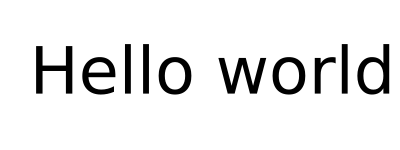

In [11]:
plot(annotations=(0.5,0.5,text("Hello world",44,:center,:middle)),
    grid=:none,frame=:none,size=(400,150))
savefig("hello.png")
img = load("hello.png")
A = @. Float64(Gray(img))
Gray.(A)

In [19]:
Float64.(Gray.(A))[75,75:100]

26-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.3843137254901961
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0



## Data tables

* [US Congress voting records](https://www.congress.gov/roll-call-votes)

In [12]:
using RDatasets, DataFrames

In [13]:
iris = dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [14]:
RDatasets.datasets()  # list of all datasets available with this package

Row,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,COUNT,affairs,affairs,601,18
2,COUNT,azdrg112,azdrg112,1798,4
3,COUNT,azpro,azpro,3589,6
4,COUNT,badhealth,badhealth,1127,3
5,COUNT,fasttrakg,fasttrakg,15,9
6,COUNT,lbw,lbw,189,10
7,COUNT,lbwgrp,lbwgrp,6,7
8,COUNT,loomis,loomis,410,11
9,COUNT,mdvis,mdvis,2227,13


In [15]:
irisM = Matrix(iris[:,1:4])

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8